**Serve Prediction using Linear Regression**

# Import Library

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [5]:
Servo_data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')


# Describe Data

In [6]:
Servo_data.head()
Servo_data.info()
Servo_data.describe()
Servo_data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

# Data Visualization

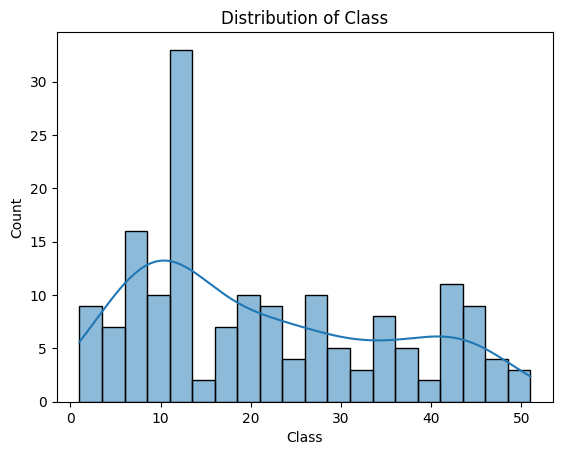

In [9]:
sns.histplot(Servo_data['Class'], bins=20, kde=True)
plt.title('Distribution of Class')
plt.show()

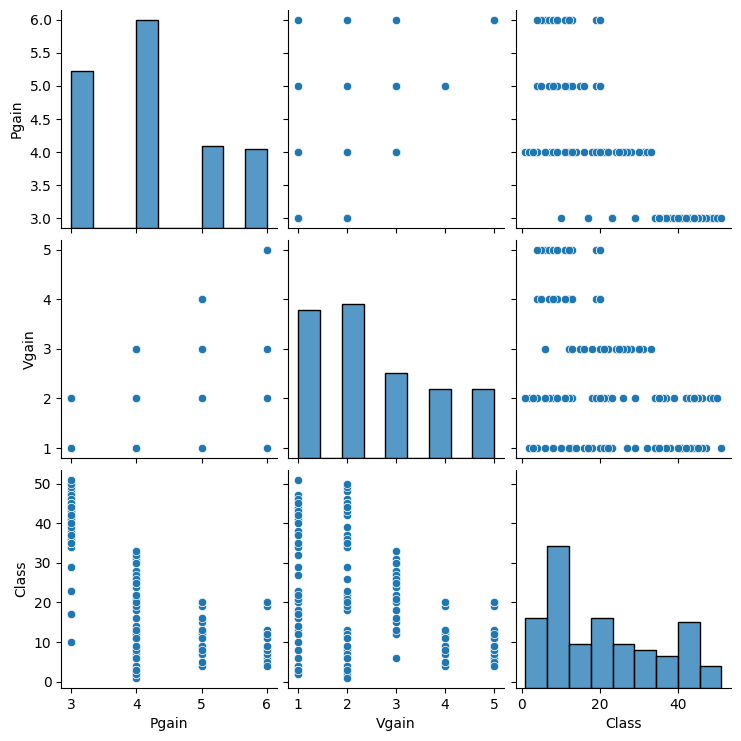

In [10]:
sns.pairplot(Servo_data)
plt.show()

# Data Preprocessing


In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for column in Servo_data.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    Servo_data[column] = label_encoders[column].fit_transform(Servo_data[column])

#Define Target Variable (y) and Feature Variables (X)

In [16]:
X = Servo_data.drop('Class', axis=1)
y = Servo_data['Class']

#  Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling

In [20]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

#Model Evaluation

In [21]:
y_pred = model.predict(X_test)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [24]:
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 21.935102941176474
R-squared: 0.906448726982944


# Prediction


In [25]:
new_data = pd.DataFrame({
    'Motor': [2, 1],
    'Screw': [5, 4],
    'Pgain': [4, 2],
    'Vgain': [1, 5]
})

In [26]:
for column in new_data.columns:
    if column in label_encoders:
        new_data[column] = label_encoders[column].transform(new_data[column])

In [27]:
predictions = model.predict(new_data)
print('Predictions for new data:', predictions)

Predictions for new data: [ 8.14 43.7 ]


#  Explanation

# 1. Imported necessary libraries for data manipulation, visualization, and modeling.
# 2. Loaded the dataset from the specified source and examined its structure.
# 3. Visualized the target variable distribution and relationships between features.
# 4. Preprocessed the data by encoding categorical variables.
# 5. Defined the target variable (y) and feature variables (X).
# 6. Split the data into training and testing sets.
# 7. Trained a RandomForestRegressor model on the training data.
# 8. Evaluated the model's performance using mean squared error and R-squared metrics.
# 9. Made predictions on new data using the trained model.
# This structured approach ensures a comprehensive analysis of the servo mechanism dataset.